# General information
 * Author: Jonathan Kuipers
 * Date: wed, 22nd November.
 * About: Data processing script for high-speed camera. 



# Load modules

In [15]:
# %matplotlib widget #requires package ipympl installed, for interactive plots.
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

np.set_printoptions(precision=4,threshold =9,suppress=True)  #Compact display of arrays.

In [2]:
path = '2023-12-01 - 12.01.mqa'
df=pd.read_csv(path, sep='\t',header=0)

Time = df['Time'].str.replace(',', '.').astype(float).to_list()
Xpos = df['Point #1.X'].str.replace(',', '.').astype(float).to_list()
Ypos = df['Point #1.Y'].str.replace(',', '.').astype(float).to_list()

# Time = df['Time'] #comment if data is comma delimited.
# Xpos = df['Point #1.X'] #comment if data is comma delimited.
# Ypos = df['Point #1.Y'] #comment if data is comma delimited.

Time = [float(Time[i]) for i in range(len(Time)) if str(Xpos[i]) != 'nan']
Xpos = [float(x) for x in Xpos if str(x) != 'nan']
Ypos = [float(x) for x in Ypos if str(x) != 'nan']

scaling = 1/1010 #scaling factor from pixel to [m]
t=np.asarray(Time)
t = t - min(t) 
x = np.asarray(Xpos) #* scaling
y = np.asarray(Ypos) #* scaling

In [11]:
class open_files:
    def __init__(self, path):
        df=pd.read_csv(path, sep='\t',header=0)

        Time = df['Time'].str.replace(',', '.').astype(float).to_list()
        Xpos = df['Point #1.X'].str.replace(',', '.').astype(float).to_list()
        Ypos = df['Point #1.Y'].str.replace(',', '.').astype(float).to_list()

        # Time = df['Time'] #comment if data is comma delimited.
        # Xpos = df['Point #1.X'] #comment if data is comma delimited.
        # Ypos = df['Point #1.Y'] #comment if data is comma delimited.

        Time = [float(Time[i]) for i in range(len(Time)) if str(Xpos[i]) != 'nan']
        Xpos = [float(x) for x in Xpos if str(x) != 'nan']
        Ypos = [float(x) for x in Ypos if str(x) != 'nan']

        scaling = 1/1010 #scaling factor from pixel to [m]
        t=np.asarray(Time)
        self.t = t - min(t) 
        self.x = np.asarray(Xpos) #* scaling
        self.y = np.asarray(Ypos)

In [17]:
class start_speed:
    def __init__(self, path):
        self.meting = open_files(path)
        
    def differentiate(self):
        x = self.meting.x
        y = self.meting.y
        self.dydx = np.diff(x)/np.diff(y)


In [ ]:
meting_1 = start_speed('2023-12-01 - 12.01.mqa')
v = meting_1.dydx



# Plot the data

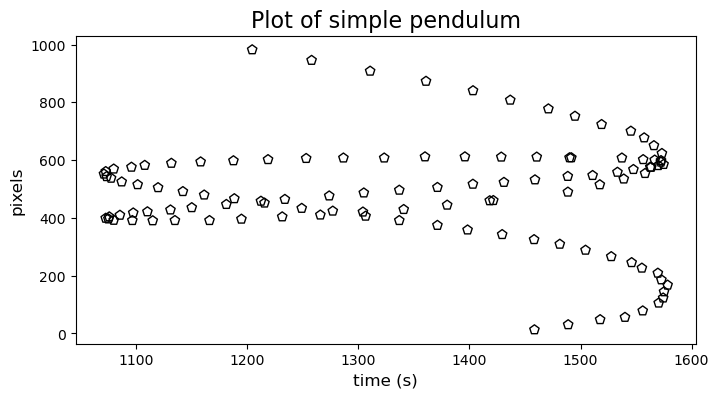

In [14]:
fig, axes = plt.subplots(1,1,figsize=(8,4)) #Creates a single figure with dimensions (8 by 4 (inch))
axes.scatter(meting_1.x ,meting_1.y ,color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint t[::10].

#plot axis labels,title and adjust limits
axes.set_title('Plot of simple pendulum',fontsize=16)
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel('pixels',fontsize=12)
# axes.set_xlim(0,5)
# axes.set_ylim(np.min(x)-0.1,np.max(x)+0.1)

plt.show()

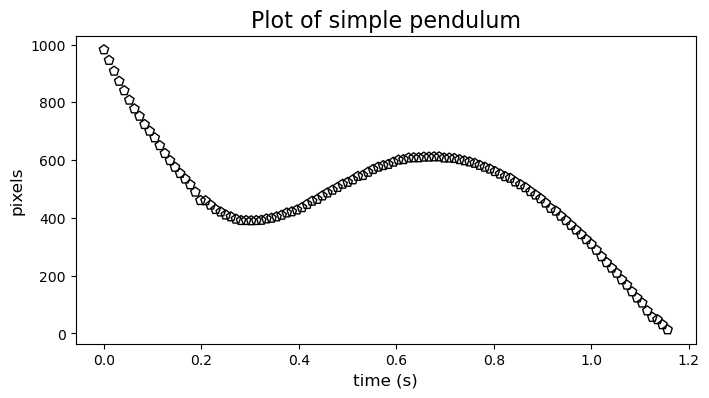

In [4]:
fig, axes = plt.subplots(1,1,figsize=(8,4)) #Creates a single figure with dimensions (8 by 4 (inch))
axes.scatter(t,y ,color = 'black', s = 50, marker ='p',ec='black',fc='none') #plot every tenth datapoint t[::10].

#plot axis labels,title and adjust limits
axes.set_title('Plot of simple pendulum',fontsize=16)
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel('pixels',fontsize=12)

# axes.set_ylim(np.min(x)-0.1,np.max(x)+0.1)

plt.show()

# function fit

In [5]:
from scipy.optimize import curve_fit

def sinus_model(t,x0,A,omega,phi):
    return x0+A*np.sin(omega*t+phi)

popt, pcov = curve_fit(sinus_model,t[30:276], x[30:276], p0=[950,275,2.5*np.pi,np.pi])

parameter=['Offset (m)', 'Amplitude (m)', 'Frequency (rad/s)', 'phase (rad)']
for i in range (4):
    print("The optimal value for ", parameter[i], 'is:', "{:.2f}".format(popt[i]), '\u00B1', "{:.5f}".format(np.sqrt(pcov[i,i])))

The optimal value for  Offset (m) is: 1321.99 ± 1.60962
The optimal value for  Amplitude (m) is: 252.98 ± 2.15075
The optimal value for  Frequency (rad/s) is: 12.94 ± 0.03965
The optimal value for  phase (rad) is: 0.33 ± 0.03094


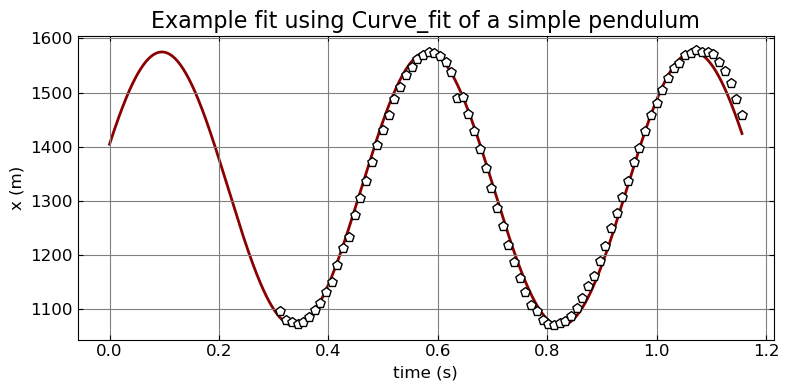

The gravitational acceleration g [$m/s^2$] =  92.07 ± 1.77


In [6]:
xfit = np.linspace(0,max(t),1000) #create new data for fit.
yfit = sinus_model(xfit,*popt)

#Plot data + fit        
fig,axes=plt.subplots(1,1,figsize=(8,4),sharex=True,sharey=True)
axes.plot(xfit, yfit, color ='darkred', lw = 2,zorder =1) #plot fit
axes.scatter(t[30:276], x[30:276], color = 'black', s = 50, marker ='p',ec='black',fc='white',zorder=2) #plot every 15th datapoint 

#plot axis labels and limits
axes.set_title('Example fit using Curve_fit of a simple pendulum',fontsize=16)
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel('x (m)',fontsize=12)
# axes.set_xlim(0,5)
# axes.set_ylim(np.min(x)-0.1,np.max(x)+0.1)

#Some plot settings
axes.tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
axes.grid(True,color='gray')
plt.tight_layout() #creates optimal padding levels for figure (especially usefull for side-by-side figures)

# location='Path' #Path to your prefered location, e.g. User/Downloads/
# plt.savefig(location+'simple_pendulum.svg') #Extension can be .png/.jpg/.etc or .svg/.pdf (Vector Image)

plt.show()

#Calculate g + error
l,omega,dl,domega=0.55,popt[2],0.01,np.sqrt(pcov[2][2])
print('The gravitational acceleration g [$m/s^2$] = ', "{:.2f}".format(omega**2*l), "\u00B1",
      "{:.2f}".format(np.sqrt((2*omega*l*domega)**2+(omega**2*dl)**2)))

# Coordination transform functions
Here is the spot for the code to transform the positional data to a cylindrical coordinate system. The perspective is also accounted for here. So if everything works, points that have the same height in the cylinder from the lab reference frame, should also have the same z-position in the cylindrical coordinate system.

In [7]:
class transformations():
    def __init__(self, time, x_array, y_array):
        self.time = time
        self.x_array = x_array
        self.y_array = y_array

    # this block of code is to define all variables for the measurement
    #==============================================================
    def setup(self, radius_ball, radius_cylinder, height_cylinder):
        # self.radius_ball = radius_ball
        # self.radius_cylinder = radius_cylinder
        self.height_cylinder = height_cylinder
        self.radius = radius_cylinder - radius_ball

    def camera_position(self, distance_camera):
        self.distance = distance_camera

    def origin_correction(self, x_origin, y_origin):
        self.x_origin = x_origin
        self.y_origin = y_origin
        self.x_centered = self.x_array - x_origin
        self.y_centered = self.y_array - y_origin
    #==================================================================

# TODO: finish the for loop
    def to_cylindrical(self, half_turns, x_origin, y_origin, radius):
        self.origin_correction(x_origin, y_origin)
        self.radius = radius
        self.z_centered = self.y_centered
        self.phi_centered = []
        if half_turns == 0:
                self.phi_centered.append(np.arccos(self.x_centered[0] / self.radius))
        else:
            self.phi_centered.append(np.arccos(self.x_centered[0] / self.radius))
        for i in range(1, len(self.time)):
            # if side == False:
            #     phi = np.arccos(self.x_centered[i] / self.radius) + np.pi
            #     if 
            # if side == True:
            if self.radius >= self.x_centered[i]:
                phi = np.arccos(self.x_centered[i] / self.radius)
            else:
                phi = np.arccos(1)
            self.phi_centered.append(phi)
        return self.z_centered, self.phi_centered




In [8]:
test_meas = transformations(t, x, y)
z_list, phi_list = test_meas.to_cylindrical(0, 951.41, 0, 110.98 )

/var/folders/c1/lpq8c56n44z6pt1f7jb4sfgc0000gn/T/ipykernel_13575/2809730067.py:32: RuntimeWarning: invalid value encountered in arccos
  self.phi_centered.append(np.arccos(self.x_centered[0] / self.radius))


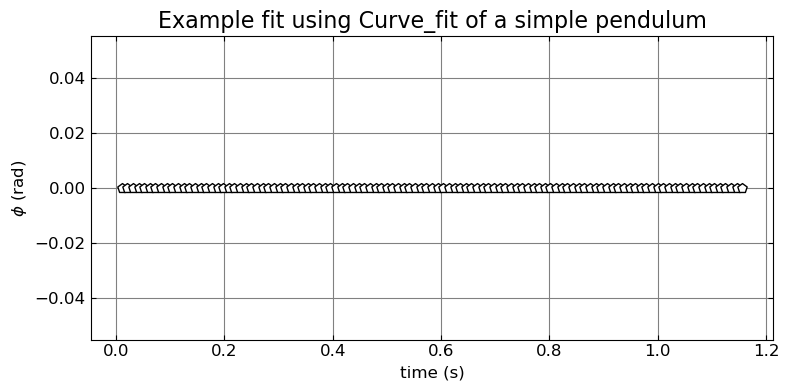

In [9]:
#Plot data + fit        
fig,axes=plt.subplots(1,1,figsize=(8,4),sharex=True,sharey=True)
# axes.plot(xfit, yfit, color ='darkred', lw = 2,zorder =1) #plot fit
axes.scatter(t, phi_list, color = 'black', s = 50, marker ='p',ec='black',fc='white',zorder=2) #plot every 15th datapoint 

#plot axis labels and limits
axes.set_title('Example fit using Curve_fit of a simple pendulum',fontsize=16)
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel('$\phi$ (rad)',fontsize=12)
# axes.set_xlim(0,5)
# axes.set_ylim(np.min(x)-0.1,np.max(x)+0.1)

#Some plot settings
axes.tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
axes.grid(True,color='gray')
plt.tight_layout() #creates optimal padding levels for figure (especially usefull for side-by-side figures)

# location='Path' #Path to your prefered location, e.g. User/Downloads/
# plt.savefig(location+'simple_pendulum.svg') #Extension can be .png/.jpg/.etc or .svg/.pdf (Vector Image)

plt.show()

#

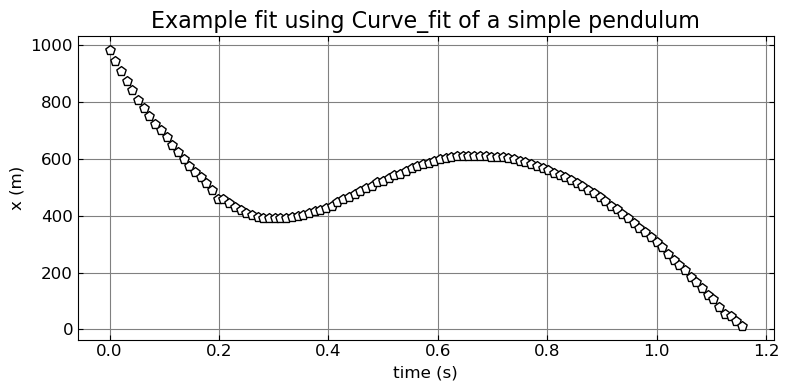

In [10]:
#Plot data + fit        
fig,axes=plt.subplots(1,1,figsize=(8,4),sharex=True,sharey=True)
# axes.plot(xfit, yfit, color ='darkred', lw = 2,zorder =1) #plot fit
axes.scatter(t, z_list, color = 'black', s = 50, marker ='p',ec='black',fc='white',zorder=2) #plot every 15th datapoint 

#plot axis labels and limits
axes.set_title('Example fit using Curve_fit of a simple pendulum',fontsize=16)
axes.set_xlabel('time (s)',fontsize=12)
axes.set_ylabel('x (m)',fontsize=12)
# axes.set_xlim(0,5)
# axes.set_ylim(np.min(x)-0.1,np.max(x)+0.1)

#Some plot settings
axes.tick_params(direction="in",labelsize=12,bottom = True,top = True,left= True,right=True) #inward direction of tick-lines
axes.grid(True,color='gray')
plt.tight_layout() #creates optimal padding levels for figure (especially usefull for side-by-side figures)

# location='Path' #Path to your prefered location, e.g. User/Downloads/
# plt.savefig(location+'simple_pendulum.svg') #Extension can be .png/.jpg/.etc or .svg/.pdf (Vector Image)

plt.show()